In [47]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [48]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0, 1, (num_examples, num_inputs)))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.from_numpy(np.random.normal(0, 0.01, size=labels.size()))

In [49]:
print(features[0], labels[0])

tensor([ 0.4604, -0.3219], dtype=torch.float64) tensor(6.2322, dtype=torch.float64)


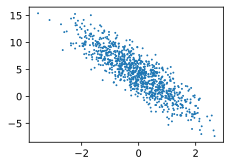

In [50]:
def use_svg_display():
    # ⽤⽮量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺⼨
    plt.rcParams['figure.figsize'] = figsize

# # 在../d2lzh_pytorch⾥⾯添加上⾯两个函数后就可以这样导⼊
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import *
# 若出现No module named 'xxx',直接pip下载即可


set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1) # plt.scatter(x=features[:, 1].numpy(), y=labels.numpy(), s=1),s表示散点的面积

In [51]:
# 本函数已保存在d2lzh包中⽅便以后使⽤
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        # torch.Tensor默认是torch.FloatTensor是32位浮点类型数据，torch.LongTensor是64位整型
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后⼀次可能不⾜⼀个batch 
        # return和yield的异同: yield用在for循环中
        yield features.index_select(0, j), labels.index_select(0, j) # 参数0表示按行索引，1表示按列进行索引

In [52]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 0.3712, -0.5195],
        [-0.5930,  0.5675],
        [-0.1714, -0.7693],
        [ 0.0252, -0.3249],
        [-0.9933, -0.0081],
        [ 1.6251,  1.5087],
        [-0.3002,  0.1991],
        [ 0.3180,  0.2304],
        [ 0.4974, -0.2285],
        [-0.8978, -0.0967]], dtype=torch.float64) tensor([6.6976, 1.0878, 6.4679, 5.3773, 2.2265, 2.3254, 2.9256, 4.0519, 5.9811,
        2.7403], dtype=torch.float64)


In [53]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [54]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [55]:
def linreg(X, w, b):    # 本函数已保存在d2lzh_pytorch包中⽅便以后使⽤
    return torch.mm(X, w) + b

In [56]:
def squared_loss(y_hat, y):   # 本函数已保存在d2lzh_pytorch包中⽅便以后使用
    # 注意这⾥返回的是向量, 另外, pytorch⾥的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [57]:
def sgd(params, lr, batch_size):   # 本函数已保存在d2lzh_pytorch包中⽅便以后使⽤
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这⾥更改param时⽤的param.data

In [60]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs): # 训练模型⼀共需要num_epochs个迭代周期
    # 在每⼀个迭代周期中，会使⽤训练数据集中所有样本⼀次（假设样本数能够被批量⼤⼩整除）。
    # X和y分别是⼩批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X.to(torch.float32), w, b), y).sum() # l是有关⼩批量X和y的损失
        l.backward() # ⼩批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size) # 使⽤⼩批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features.to(torch.float32), w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.000110
epoch 2, loss 0.000049
epoch 3, loss 0.000049


In [61]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 2.0000],
        [-3.3994]], requires_grad=True)
4.2 
 tensor([4.1992], requires_grad=True)
